<a href="https://colab.research.google.com/github/Max-JI64/Kakao_Tech_Bootcamp/blob/main/Assignment/week7/7%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C2_max_ji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import time
import random
import os
import torch


In [ ]:
#재현성 고정
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # multi-GPU 환경
    torch.backends.cudnn.deterministic = True  # 완전 재현을 원할 때
    torch.backends.cudnn.benchmark = False     # GPU 최적화 탐색 비활성 (불확실성 제거)
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"[Seed fixed to {seed}]")

# VGG16

In [ ]:
model = VGG16(weights='imagenet', include_top=True) #FC층을 포함 <- 이미지넷 사전학습
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# CIFAR-10 데이터셋

In [ ]:
# CIFAR-10 불러오기
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# train: 40,000 / val: 10,000 / test: 10,000 분리
x_train = x_train_full[:40000]
y_train = y_train_full[:40000]

x_val = x_train_full[40000:50000]
y_val = y_train_full[40000:50000]

# 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_val   = to_categorical(y_val, 10)
y_test  = to_categorical(y_test, 10)

# 확인
print("Train:", x_train.shape, y_train.shape)
print("Val  :", x_val.shape, y_val.shape)
print("Test :", x_test.shape, y_test.shape)


Train: (40000, 32, 32, 3) (40000, 10)
Val  : (10000, 32, 32, 3) (10000, 10)
Test : (10000, 32, 32, 3) (10000, 10)


# I. Feature Extraction

사전학습 VGG16에서 FC층을 버리고 CIFAR-10에 맞는 FC층으로 대체한다  
Conv층의 파라미터는 기존의 사전학습의 것을 사용한다

## 데이터 전처리

In [ ]:
BATCH = 64 #배치 사이즈
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(x, y):
    """
    이미지 픽셀 값을 이미지넷 학습 당시의 통계로 바꾸어줌
    RGB를 BGR로 변환
    체널별 평균값 빼기
    """
    x = tf.cast(x, tf.float32)  #preprocess_input은 float32를 사용함
    x = preprocess_input(x)
    return x, y

train_ds = (tf.data.Dataset
            .from_tensor_slices((x_train, y_train))
            .shuffle(40000)
            .map(preprocess, num_parallel_calls=AUTOTUNE)
            .batch(BATCH)
            .prefetch(AUTOTUNE))

val_ds = (tf.data.Dataset
          .from_tensor_slices((x_val, y_val))
          .map(preprocess, num_parallel_calls=AUTOTUNE)
          .batch(BATCH)
          .prefetch(AUTOTUNE))

test_ds = (tf.data.Dataset
           .from_tensor_slices((x_test, y_test))
           .map(preprocess, num_parallel_calls=AUTOTUNE)
           .batch(BATCH)
           .prefetch(AUTOTUNE))

## 사전학습 모델 불러오기

In [ ]:
set_seed(42)

[Seed fixed to 42]


In [ ]:
model_feature_base = VGG16(weights='imagenet',
                           include_top=False, # 기존 분류기 FC층은 버린다 -> Feature extraction을 위하여
                           input_shape=(32,32,3)) # CIFAR-10 원본 크기 유지
model_feature_base.trainable = False #모델의 모든 가중치는 학습하지 않겠다

## 분류기 생성

In [ ]:
model_feature = models.Sequential([
    model_feature_base,
    layers.GlobalAveragePooling2D(), #각 feature map에 대해 공간 전체의 평균값 -> 1개의 숫자로 요약 -> 1차원 벡터 (512,)
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # CIFAR-10 (10 classes)
])

In [ ]:
model_feature.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model_feature.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

## 학습

In [ ]:
EPOCHS = 30
feature_start_time = time.time()

history_feature = model_feature.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    batch_size=64,
    verbose=1
)

feature_total_time = time.time() - feature_start_time
print("\n")
print(f"Feature Extration 총 학습시간 {feature_total_time:.2f} 초")

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4342 - loss: 4.7279 - val_accuracy: 0.5833 - val_loss: 1.2100
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5957 - loss: 1.1724 - val_accuracy: 0.6254 - val_loss: 1.1012
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6449 - loss: 1.0181 - val_accuracy: 0.6288 - val_loss: 1.0934
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6677 - loss: 0.9403 - val_accuracy: 0.6512 - val_loss: 1.0453
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6931 - loss: 0.8647 - val_accuracy: 0.6498 - val_loss: 1.0503
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7035 - loss: 0.8350 - val_accuracy: 0.6556 - val_loss: 1.0463
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7190 - loss: 0.7867 - val_accuracy: 0.6572 - val_loss: 1.0628
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7310 - loss: 0.7495 - val_accuracy: 

## 테스트 평가

In [ ]:
feature_test_loss, feature_test_acc = model_feature.evaluate(test_ds, verbose=1)
print(f"Feature Extraction test_loss={feature_test_loss:.4f}, test_acc={feature_test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6490 - loss: 1.7786
Feature Extraction test_loss=1.7513, test_acc=0.6450


# II. Partial Fine Tuning 적용

## 사전학습 모델 불러오기

In [ ]:
set_seed(42)

[Seed fixed to 42]


In [ ]:
model_fine_base = VGG16(weights='imagenet',
                           include_top=False, # 기존 분류기 FC층은 버린다 -> Fine Tuning을 위하여
                           input_shape=(32,32,3)) # CIFAR-10 원본 크기 유지

## 분류기 생성

block5만 학습할 것이다

In [ ]:
for layer in model_fine_base.layers:
    if layer.name.startswith('block5'):
        layer.trainable = True   # 튜닝할 층
    else:
        layer.trainable = False  # 나머지는 동결

In [ ]:
model_fine = models.Sequential([
    model_fine_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model_fine.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), #Feature Extraction보다 낮은 학습률
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_fine.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 7,213,322 (27.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

## 학습

In [ ]:
EPOCHS = 30
fine_start_time = time.time()

history_fine = model_fine.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    batch_size=64,
    verbose=1
)

fine_total_time = time.time() - fine_start_time
print("\n")
print(f"Fine Tuning 총 학습시간 {fine_total_time:.2f} 초")

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.1815 - loss: 2.6009 - val_accuracy: 0.5106 - val_loss: 1.4401
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5834 - loss: 1.2251 - val_accuracy: 0.7312 - val_loss: 0.7873
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7633 - loss: 0.7204 - val_accuracy: 0.7698 - val_loss: 0.7127
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8226 - loss: 0.5315 - val_accuracy: 0.7745 - val_loss: 0.7136
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8693 - loss: 0.3948 - val_accuracy: 0.7908 - val_loss: 0.6887
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8992 - loss: 0.3045 - val_accuracy: 0.7948 - val_loss: 0.7207
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9263 - loss: 0.2238 - val_accuracy: 0.7913 - val_loss: 0.7545
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9465 - loss: 0.1637 - val_accuracy: 

## 테스트 평가

In [ ]:
fine_test_loss, fine_test_acc = model_fine.evaluate(test_ds, verbose=1)
print(f"Fine Tuning test_loss={fine_test_loss:.4f}, test_acc={fine_test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7811 - loss: 1.7244
Fine Tuning test_loss=1.7115, test_acc=0.7796


# III. 성능 비교표 및 손실, 정확도 학습곡선

## 성능 비교표

In [ ]:
import pandas as pd
result = {
    "total_parameters": [model_feature.count_params(), model_fine.count_params()],
    "trainable_parameters": [np.sum([tf.keras.backend.count_params(w) for w in model_feature.trainable_weights]), np.sum([tf.keras.backend.count_params(w) for w in model_fine.trainable_weights])],
    "val_best_loss": [min(history_feature.history['val_loss']),
                      min(history_fine.history['val_loss'])],
    "val_best_accuracy": [max(history_feature.history['val_accuracy']),
                          max(history_fine.history['val_accuracy'])],
    "test_loss":[feature_test_loss, fine_test_loss],
    "test accurecy":[feature_test_acc, fine_test_acc],
    "train_time(s)": [feature_total_time, fine_total_time]
    }
result_df = pd.DataFrame(result, index=["Feature Extraction", "Fine-tuning (block5)"]).T.round(2)
result_df

,Feature Extraction,Fine-tuning (block5)
total_parameters,14848586.00,14848586.00
trainable_parameters,133898.00,7213322.00
val_best_loss,1.05,0.69
val_best_accuracy,0.66,0.80
test_loss,1.75,1.71
test accurecy,0.64,0.78
train_time(s),124.71,170.28


## 손실, 정확도 학습 곡선

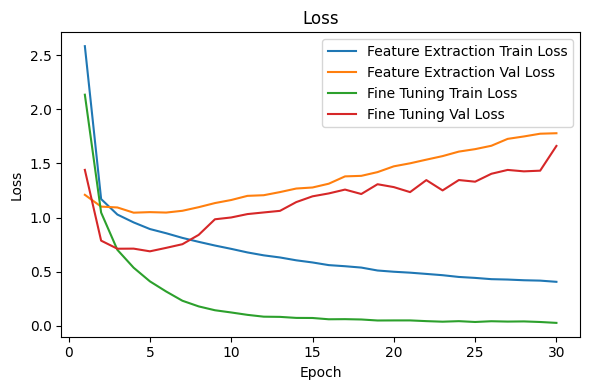

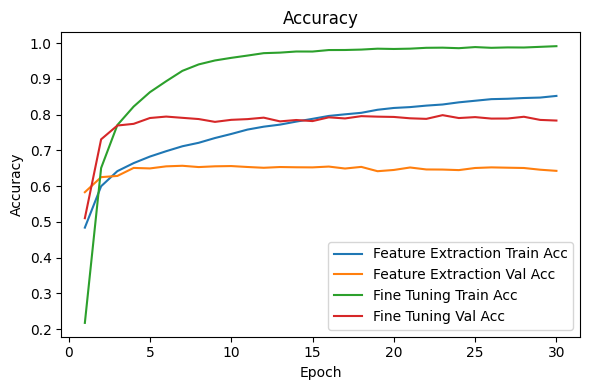

In [ ]:
epochs = range(1, 30+1)

plt.figure(figsize=(6,4))
plt.plot(epochs, history_feature.history['loss'], label='Feature Extraction Train Loss')
plt.plot(epochs, history_feature.history['val_loss'], label='Feature Extraction Val Loss')
plt.plot(epochs, history_fine.history['loss'], label='Fine Tuning Train Loss')
plt.plot(epochs, history_fine.history['val_loss'], label='Fine Tuning Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss'); plt.legend()
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs, history_feature.history['accuracy'], label='Feature Extraction Train Acc')
plt.plot(epochs, history_feature.history['val_accuracy'], label='Feature Extraction Val Acc')
plt.plot(epochs, history_fine.history['accuracy'], label='Fine Tuning Train Acc')
plt.plot(epochs, history_fine.history['val_accuracy'], label='Fine Tuning Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy'); plt.legend()
plt.tight_layout(); plt.show()